In [ ]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **Introduction**
Pada 15 April 1912, pada saat pelayaran perdananya, RMS Titanic yang diklaim tidak bisa tenggelam malah tenggelam setelah bertabrakan dengan gunung es. Sayangnya,tidak tersedia sekoci yang cukup untuk semua orang di dalamnya, yang mengakibatkan 1502 kematian dari 2.224 penumpang dan awak kapal.

Meskipun ada beberapa elemen keberuntungan yang terlibat dalam bertahan hidup, tampaknya beberapa kelompok orang lebih mungkin untuk bertahan hidup daripada yang lain.

### **Problem Statement**
Membangun sebuah model prediktif yang dapat mengetahui kategori orang yang dapat bertahan hidup pada kejadian tersebut.

### **Background**
RMS Titanic adalah sebuah kapal penumpang super Britania Raya yang tenggelam di Samudra Atlantik Utara pada tanggal 15 April 1912 setelah menabrak sebuah gunung es pada pelayaran perdananya dari Southampton, Inggris ke New York City. Tenggelamnya Titanic mengakibatkan kematian sebanyak 1.514 orang dalam salah satu bencana maritim masa damai paling mematikan sepanjang sejarah. Titanic merupakan kapal terbesar di dunia pada pelayaran perdananya. Satu dari tiga kapal samudra kelas Olympic dioperasikan oleh White Star Line. 

Ada banyak faktor yang mempengaruhi seseorang untuk selamat dari sebuah tragedi atau kecelakaan kapal laut, diantaranya yaitu usia, jenis kelamin, jumlah keluarga dll.
 
Untuk memprediksi kemungkinan orang yang selamat dalam sebuah tragedi adalah dengan menggunakan machine learning jenis Decision Tree.
# **Methodology**
## Data Acquisition
ata berasal dari kaggle.com dengan judul 
Titanic: Machine Learning from Disaster
Dataset terdiri dari dua file `.csv`:
1. `train.csv`: digunakan untuk membangun model machine learning. Terdapat ‘feature’ survival di setiap penumpang yang menggambarkan apakah orang tersebut selamat atau tidak.

2. `test.csv`: digunakan sebagai data yang akan diprediksi. Tidak terdapat feature survival  pada dataset ini

Berikut merupakan penjelasan dari setiap *feature*:
- `survival` : Dependent Variables
- `pclass`   : Kelas ekonomi penumpang
- `Sex`      : Jenis kelamin
- `Age`      : Umur penumpang
- `sibsp`    : Jumlah saudara / pasangan yang ikut bersama penumpang
- `parch`    : Jumlah orang tua/anak yang ikut bersama penumpang
- `ticket`   : Nomor tiket
- `fare`     : Harga tiket
- `embarked` : Pelabuhan Asal

#### **Import Data**



In [ ]:
file1='train.csv'
#buka1=open(file1,'r')
df=pd.read_csv(file1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Pre-Procesing
Pada data pre-processing dilakukan cleaning data dengan menghapus column yang tidak diperlukan. Pada `train.csv` dan `test.csv` kami tidak menggunakan *feature* `Cabin` dikarenakan sebagian besar data `NaN`. lalu kami melakukan transformasi pada data yang memiliki tipe data numeric seperti `Sex`, `Embarked`, dll.
#### **Check Total Null in Each Column**

Tahap berikutnya adalah memeriksa apakah dataset tersebut lengkap terisi.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **Transform into numerical value**



In [ ]:
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
df['Age'] = pd.qcut(df['Age'], 10, labels=False)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,7.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,4.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,6.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,6.0,0,0,373450,8.0500,NaN,1.0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,4.372549,0.523008,0.381594,32.204208,1.362205
std,257.353842,0.486592,0.836071,0.477990,2.903038,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,7.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,9.000000,8.000000,6.000000,512.329200,3.000000


#### **Drop NaN row/column**

In [ ]:
feature = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp','Survived']
df = df[feature]
df.dropna(axis=0, inplace=True)
df.isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

#### **Hasil Data Yang Sudah Dibersihkan**

In [ ]:
df.describe()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,4.362360,1.261236,34.567251,0.432584,2.240169,0.636236,0.514045,0.404494
std,2.900243,0.521561,52.938648,0.854181,0.836854,0.481420,0.930692,0.491139
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,8.050000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,15.645850,0.000000,2.000000,1.000000,0.000000,0.000000
75%,7.000000,1.000000,33.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,9.000000,3.000000,512.329200,6.000000,3.000000,1.000000,5.000000,1.000000


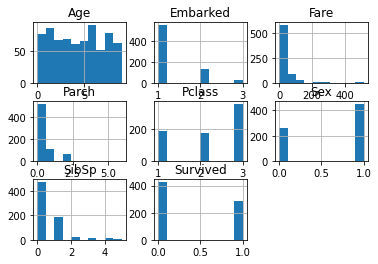

In [ ]:
df.hist()
plt.show()

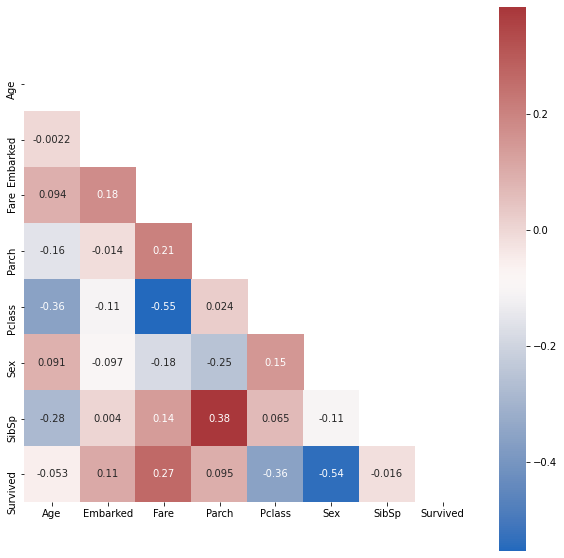

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr,
                 mask = mask,
                 square =True,
                 cmap="vlag",
                 annot=True
                )

#### **Memisahkan Fitur Yang Diperlukan dan Membagi Dataset**

Kemudian langkah terakhir adalah memisahkan fitur yang diperlukan dan membagi dataset tersebut kedalam dua bagian. Yaitu data training dan data testing. Kami akan membagi dataset dengan perbandingan 80% sebagai data training dan 20% sebagai data test.

In [ ]:
X = df[['Pclass', 'Sex','Embarked','Fare','Parch','SibSp','Age']]
y = df[['Survived']]

#### **Memisahkan Fitur Yang Diperlukan**

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

## Experiment and Evaluation

Disini akan digunakan beberapa metode, diantaranya adalah:
- Decision Tree
- Random Forest
- SVM
- Naive Bayes
Kemudian dari keempat model tersebut akan dikomparasi

#### **Decision Tree**

In [ ]:
survivedTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

clf = survivedTree.fit(X_trainset,y_trainset)
predTree = clf.predict(X_testset)
predTree

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_testset, predTree),columns = ['Positif','Negative'],index = ['True','False'])

,Positif,Negative
True,74,10
False,17,42


In [ ]:
dt_ac = metrics.accuracy_score(y_testset, pred_rf)
dt_pr =  metrics.precision_score(y_testset, pred_rf)
dt_re = metrics.recall_score(y_testset, pred_rf)

print("Naive Bayes Accuracy: ", dt_ac)
print("Naive Bayes Precision: ",dt_pr)
print("Naive Bayes Recall: ", dt_re)

Naive Bayes Accuracy:  0.7902097902097902
Naive Bayes Precision:  0.8536585365853658
Naive Bayes Recall:  0.5932203389830508


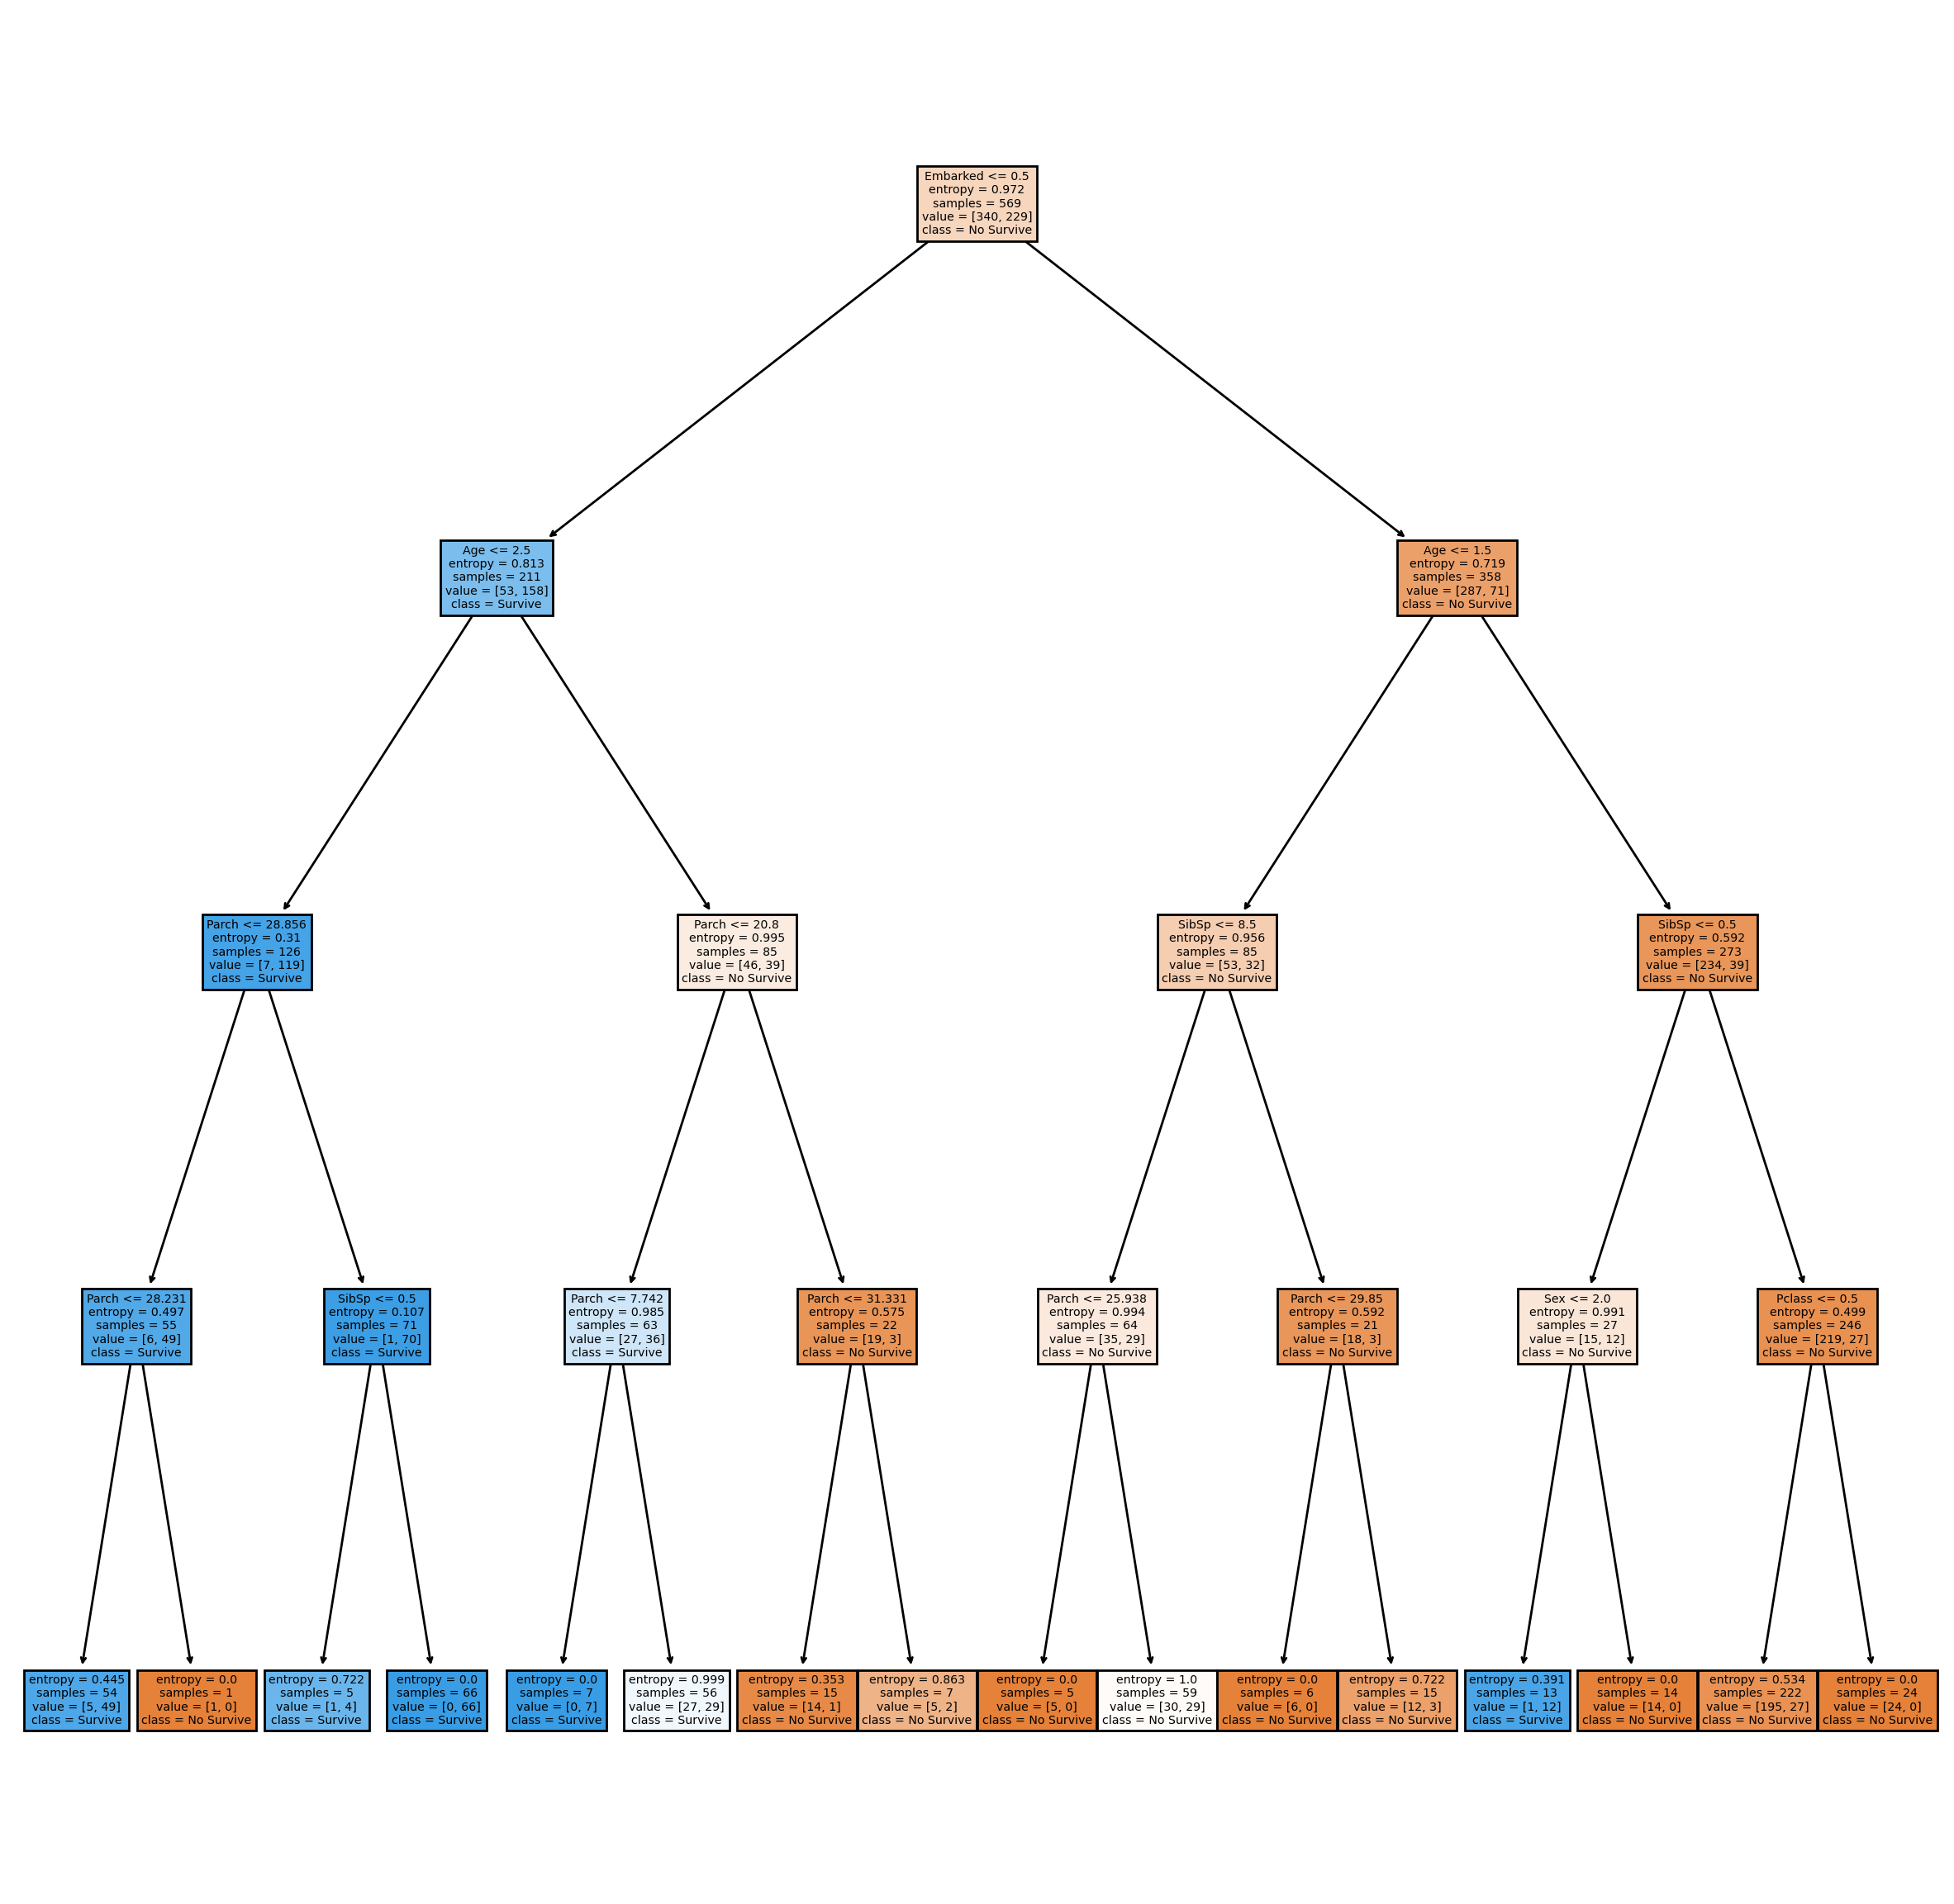

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=200)
tree.plot_tree(clf,
               feature_names = feature,
               class_names=['No Survive','Survive'],
               filled = True);
fig.savefig('imagename.png')


#### **Random Forrest**

In [ ]:
clf_rf = RandomForestClassifier(criterion="entropy", max_depth = 4)

clf_rf.fit(X_trainset,y_trainset)
pred_rf = clf_rf.predict(X_testset)
pred_rf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_testset, pred_rf),columns = ['Positif','Negative'],index = ['True','False'])

,Positif,Negative
True,77,7
False,21,38


In [ ]:
rf_ac = metrics.accuracy_score(y_testset, pred_rf)
rf_pr =  metrics.precision_score(y_testset, pred_rf)
rf_re = metrics.recall_score(y_testset, pred_rf)

print("Naive Bayes Accuracy: ", rf_ac)
print("Naive Bayes Precision: ",rf_pr)
print("Naive Bayes Recall: ", rf_re)

Naive Bayes Accuracy:  0.8041958041958042
Naive Bayes Precision:  0.8444444444444444
Naive Bayes Recall:  0.6440677966101694


#### **SVM**

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

svc = svm.SVC(kernel='linear').fit(X_testset, y_testset)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_testset, y_testset)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_testset,y_testset)
lin_svc = svm.LinearSVC(C=C).fit(X_testset, y_testset)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
clf_svm = [svc, lin_svc, rbf_svc, poly_svc]
svm_ac = 0
svm_pr = 0
svm_re = 0
  
for clf in clf_svm:
  print("X"*100)
  print(str(clf))
  print("="*100)
  pred_svm_temp = clf.predict(X_testset)
  print(pd.DataFrame(metrics.confusion_matrix(y_testset, pred_svm_temp),columns = ['Positif','Negative'],index = ['True','False']))
  print()
  
  svm_ac_temp = metrics.accuracy_score(y_testset, pred_svm_temp)
  svm_pr_temp =  metrics.precision_score(y_testset, pred_svm_temp)
  svm_re_temp = metrics.recall_score(y_testset, pred_svm_temp)
  
  print("Naive Bayes Accuracy: ", svm_ac_temp)
  print("Naive Bayes Precision: ",svm_pr_temp)
  print("Naive Bayes Recall: ", svm_re_temp)
  
  if svm_ac_temp > svm_ac:
    svm_ac = svm_ac_temp
  if svm_pr_temp > svm_pr:
    svm_pr = svm_pr_temp
  if svm_re_temp > svm_re:
    svm_re = svm_re_temp
  print()

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
       Positif  Negative
True        73        11
False       22        37

Naive Bayes Accuracy:  0.7692307692307693
Naive Bayes Precision:  0.7708333333333334
Naive Bayes Recall:  0.6271186440677966

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
       Positif  Negative
True        81         3
False       39        20

Naive Bayes Accuracy:  0.706293706293

In [ ]:
print('RBF')
print("SVM Accuracy: ", svm_ac)
print("SVM Precision: ",svm_pr)
print("SVM Recall: ", svm_re)

RBF
SVM Accuracy:  0.9300699300699301
SVM Precision:  0.9454545454545454
SVM Recall:  0.8813559322033898


Dari uji coba model SVM dengan menggunakan 4 kernel, didapatkan bahwa kernel RBF memiliki akurasi hingga 0.93.

#### **Naive Bayes**

In [ ]:
clf_nb = GaussianNB()

clf_nb.fit(X_trainset,y_trainset)
pred_nb = clf_nb.predict(X_testset)
pred_nb

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_testset, pred_rf),columns = ['Positif','Negative'],index = ['True','False'])

,Positif,Negative
True,77,7
False,21,38


In [ ]:

nb_ac = metrics.accuracy_score(y_testset, pred_rf)
nb_pr =  metrics.precision_score(y_testset, pred_rf)
nb_re = metrics.recall_score(y_testset, pred_rf)
print("Naive Bayes Accuracy: ", nb_ac)
print("Naive Bayes Precision: ",nb_pr)
print("Naive Bayes Recall: ", nb_re)

Naive Bayes Accuracy:  0.8041958041958042
Naive Bayes Precision:  0.8444444444444444
Naive Bayes Recall:  0.6440677966101694


## Training And Testing Result


[0 1 2]


Text(0.5, 1.0, 'Perbandindan Metode Klasifikasi')

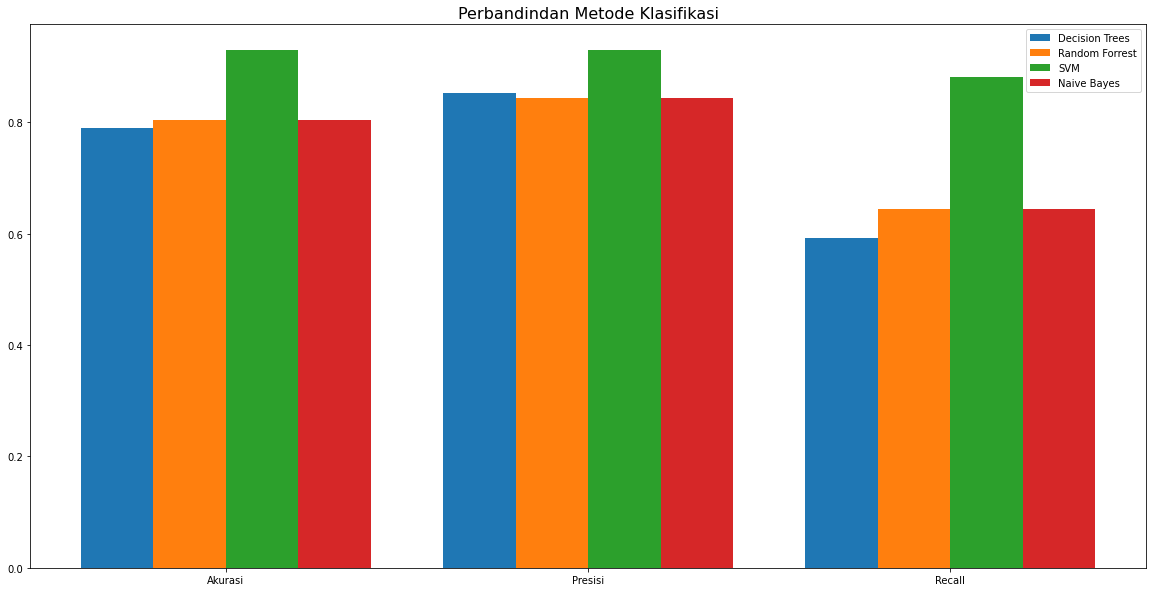

In [ ]:
df = pd.DataFrame({
    'Metode':['Decision Trees','Random Forrest','SVM','Naive Bayes'],
    'Akurasi' : [dt_ac,rf_ac,svm_ac,nb_ac],
    'Presisi' : [dt_pr,rf_pr,svm_ac,nb_pr],
    'Recall'  : [dt_re,rf_re,svm_re,nb_re]
})
label = ['Akurasi','Presisi','Recall']

legend1 = df['Metode'][0]
data1 = df.iloc[0, 1:].tolist()
legend2 = df['Metode'][1]
data2 = df.iloc[1, 1:].tolist()
legend3 = df['Metode'][2]
data3 = df.iloc[2, 1:].tolist()
legend4 = df['Metode'][3]
data4 = df.iloc[3, 1:].tolist()

n = len(label)
ind = np.arange(n)
  
print(ind)
width = 0.2
fig,ax = plt.subplots()
            
    
fig.set_figheight(10)
fig.set_figwidth(20)

    
ax.bar(ind - (width/2)-width,data1,width,label = legend1)
ax.bar(ind - (width/2),data2,width,label = legend2)
ax.bar(ind + width/2,data3,width,label = legend3)
ax.bar(ind + (width/2)+width,data4,width,label = legend4)


ax.set_xticks(ind)
ax.set_xticklabels(label)
  
ax.legend()
ax.set_title('Perbandindan Metode Klasifikasi',fontsize=16)

Terlihat bahwa SVM memiliki kinerja yang lebih baik jika dibandingkan dengan metode-metode lain. Berikut merupakan skor dari setiap parameter uji coba

In [ ]:
df

,Metode,Akurasi,Presisi,Recall
0,Decision Trees,0.790210,0.853659,0.593220
1,Random Forrest,0.804196,0.844444,0.644068
2,SVM,0.930070,0.930070,0.881356
3,Naive Bayes,0.804196,0.844444,0.644068
